# Making modeling scheme validation figures using 3 taxa

* Taxa differing in G+C content
  * low GC = 
  * mid GC = E. coli
  * high GC = 

### Genomic fragment simulation

* Sup Figure:
  * 3 taxa of differing GC
  * Fragment length distributions
    * 'realistic' = skewed normal
    * 'large' = ~50 kb
    * 'small' = ~1-2 kb
  * faceted heatmap:
    * taxa ~ (fragment length distribution)

### Diffusion calculations

* Sup Figure:
  * 3 taxa of differing GC (same as last)
  * histograms:
    * BD distribution for pre & post diffusion 
  * Shows effect of diffusion & how it relates to fragment length


# Setting variables

In [169]:
workDir = '/home/nick/notebook/SIPSim/dev/bac_genome3/validation/'
genomeDir = '/home/nick/notebook/SIPSim/dev/bac_genome3/genomes/'
R_dir = '/home/nick/notebook/SIPSim/lib/R/'
figDir = '/home/nick/notebook/SIPSim/figures/'

# Init

In [170]:
import glob
from os.path import abspath
import nestly
from IPython.display import Image
import dill

In [171]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [172]:
%%R
library(ggplot2)
library(plyr)
library(dplyr)
library(tidyr)
library(gridExtra)

In [173]:
if not os.path.isdir(workDir):
    os.makedirs(workDir)

# Simulating fragments

  * Fragment length distributions
    * 'realistic' = skewed normal
    * 'large' = ~50 kb
    * 'small' = ~1-2 kb

In [174]:
!cd $workDir; \
    SIPSim fragments \
    $genomeDir/genome_index.txt \
    --fp $genomeDir \
    --fr ../../515F-806R.fna \
    --fld skewed-normal,9000,2500,-5 \
    --flr None,None \
    --nf 10000 \
    --np 24 \
    --tbl \
    2> ampFrags_real.log \
    > ampFrags_real.txt       

In [175]:
!cd $workDir; \
    SIPSim fragments \
    $genomeDir/genome_index.txt \
    --fp $genomeDir \
    --fr ../../515F-806R.fna \
    --fld uniform,1000,2000 \
    --flr None,None \
    --nf 10000 \
    --np 24 \
    --tbl \
    2> ampFrags_sm.log \
    > ampFrags_sm.txt       

In [176]:
!cd $workDir; \
    SIPSim fragments \
    $genomeDir/genome_index.txt \
    --fp $genomeDir \
    --fr ../../515F-806R.fna \
    --fld uniform,50000,51000 \
    --flr None,None \
    --nf 10000 \
    --np 24 \
    --tbl \
    2> ampFrags_lg.log \
    > ampFrags_lg.txt       

## Plotting fragments

In [177]:
%%R -i workDir
setwd(workDir)

files = c('ampFrags_real.txt',
          'ampFrags_sm.txt',
          'ampFrags_lg.txt')

tbl.l = list()
for(f in files){
    tbl.l[[f]] = read.delim(f, sep='\t')
    }
tbl = do.call(rbind, tbl.l)
tbl %>% head

                                           taxon_name
ampFrags_real.txt.1 Clostridium_ljungdahlii_DSM_13528
ampFrags_real.txt.2 Clostridium_ljungdahlii_DSM_13528
ampFrags_real.txt.3 Clostridium_ljungdahlii_DSM_13528
ampFrags_real.txt.4 Clostridium_ljungdahlii_DSM_13528
ampFrags_real.txt.5 Clostridium_ljungdahlii_DSM_13528
ampFrags_real.txt.6 Clostridium_ljungdahlii_DSM_13528
                                                    scaffoldID fragStart
ampFrags_real.txt.1 CP001666_Clostridium_ljungdahlii_DSM_13528   1479222
ampFrags_real.txt.2 CP001666_Clostridium_ljungdahlii_DSM_13528   2672877
ampFrags_real.txt.3 CP001666_Clostridium_ljungdahlii_DSM_13528   2743558
ampFrags_real.txt.4 CP001666_Clostridium_ljungdahlii_DSM_13528   2646102
ampFrags_real.txt.5 CP001666_Clostridium_ljungdahlii_DSM_13528   2395218
ampFrags_real.txt.6 CP001666_Clostridium_ljungdahlii_DSM_13528    288617
                    fragLength   fragGC
ampFrags_real.txt.1       6148 29.50553
ampFrags_real.txt.2       8966 

In [178]:
%%R
tbl$fld = gsub('\\.txt.+', '', rownames(tbl))
tbl %>% head

                                           taxon_name
ampFrags_real.txt.1 Clostridium_ljungdahlii_DSM_13528
ampFrags_real.txt.2 Clostridium_ljungdahlii_DSM_13528
ampFrags_real.txt.3 Clostridium_ljungdahlii_DSM_13528
ampFrags_real.txt.4 Clostridium_ljungdahlii_DSM_13528
ampFrags_real.txt.5 Clostridium_ljungdahlii_DSM_13528
ampFrags_real.txt.6 Clostridium_ljungdahlii_DSM_13528
                                                    scaffoldID fragStart
ampFrags_real.txt.1 CP001666_Clostridium_ljungdahlii_DSM_13528   1479222
ampFrags_real.txt.2 CP001666_Clostridium_ljungdahlii_DSM_13528   2672877
ampFrags_real.txt.3 CP001666_Clostridium_ljungdahlii_DSM_13528   2743558
ampFrags_real.txt.4 CP001666_Clostridium_ljungdahlii_DSM_13528   2646102
ampFrags_real.txt.5 CP001666_Clostridium_ljungdahlii_DSM_13528   2395218
ampFrags_real.txt.6 CP001666_Clostridium_ljungdahlii_DSM_13528    288617
                    fragLength   fragGC           fld
ampFrags_real.txt.1       6148 29.50553 ampFrags_real
amp

In [179]:
%%R 

fld.revalue = c('ampFrags_real' = 'skewed normal (mean = 9 kb)',
                  'ampFrags_sm' = 'uniform (1-2 kb)',
                  'ampFrags_lg' = 'uniform (50-51 kb)')

taxon.revalue = c('Clostridium_ljungdahlii_DSM_13528' = 'Clostridium_ljungdahlii\nDSM_13528',
                  'Streptomyces_pratensis_ATCC_33331' = 'Streptomyces_pratensis\nATCC_33331')


tbl.f = tbl %>%
    mutate(taxon_name = revalue(taxon_name, taxon.revalue),
           fld = revalue(fld, fld.revalue)) %>%
    mutate(taxon_name = gsub('_', ' ', taxon_name))

tbl.f %>% head

                                            taxon_name
ampFrags_real.txt.1 Clostridium ljungdahlii\nDSM 13528
ampFrags_real.txt.2 Clostridium ljungdahlii\nDSM 13528
ampFrags_real.txt.3 Clostridium ljungdahlii\nDSM 13528
ampFrags_real.txt.4 Clostridium ljungdahlii\nDSM 13528
ampFrags_real.txt.5 Clostridium ljungdahlii\nDSM 13528
ampFrags_real.txt.6 Clostridium ljungdahlii\nDSM 13528
                                                    scaffoldID fragStart
ampFrags_real.txt.1 CP001666_Clostridium_ljungdahlii_DSM_13528   1479222
ampFrags_real.txt.2 CP001666_Clostridium_ljungdahlii_DSM_13528   2672877
ampFrags_real.txt.3 CP001666_Clostridium_ljungdahlii_DSM_13528   2743558
ampFrags_real.txt.4 CP001666_Clostridium_ljungdahlii_DSM_13528   2646102
ampFrags_real.txt.5 CP001666_Clostridium_ljungdahlii_DSM_13528   2395218
ampFrags_real.txt.6 CP001666_Clostridium_ljungdahlii_DSM_13528    288617
                    fragLength   fragGC                         fld
ampFrags_real.txt.1       6148 29.50

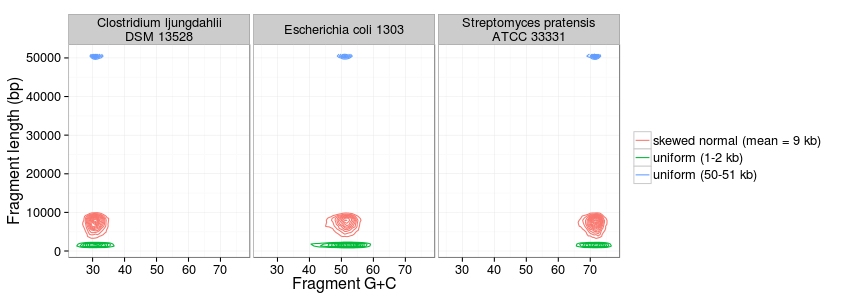

In [180]:
%%R -w 850 -h 300

ggplot(tbl.f, aes(fragGC, fragLength, color=fld)) +
    stat_density2d() +
    scale_color_discrete(name='') +
    labs(x='Fragment G+C', y='Fragment length (bp)') +
    facet_grid(. ~ taxon_name) +
    theme_bw() +
    theme(
        text=element_text(size=16),
        axis.title.y=element_text(vjust=1)
        )

In [181]:
%%R -i figDir

outFile = paste(c(figDir, 'genome3_fragKDE.pdf'), collapse='/')
ggsave(outFile, width=10, height=4)

# Converting to KDE

In [182]:
!cd $workDir; \
    SIPSim fragment_kde \
    ampFrags_real.txt \
    > ampFrags_real_kde.pkl
    
!cd $workDir; \
    SIPSim fragment_kde \
    ampFrags_sm.txt \
    > ampFrags_sm_kde.pkl
    
!cd $workDir; \
    SIPSim fragment_kde \
    ampFrags_lg.txt \
    > ampFrags_lg_kde.pkl    

# Adding diffusion

In [183]:
!cd $workDir; \
    SIPSim diffusion \
    ampFrags_real_kde.pkl \
    --np 24 \
    > ampFrags_real_kde_dif.pkl    
    
!cd $workDir; \
    SIPSim diffusion \
    ampFrags_sm_kde.pkl \
    --np 24 \
    > ampFrags_sm_kde_dif.pkl    
    
!cd $workDir; \
    SIPSim diffusion \
    ampFrags_lg_kde.pkl \
    --np 24 \
    > ampFrags_lg_kde_dif.pkl        

Processing: Clostridium_ljungdahlii_DSM_13528
Processing: Streptomyces_pratensis_ATCC_33331
Processing: Escherichia_coli_1303
Processing: Clostridium_ljungdahlii_DSM_13528
Processing: Streptomyces_pratensis_ATCC_33331
Processing: Escherichia_coli_1303
Processing: Clostridium_ljungdahlii_DSM_13528
Processing: Streptomyces_pratensis_ATCC_33331
Processing: Escherichia_coli_1303


# Plotting fragment distribution w/ and w/out diffusion

## Making a table of fragment values from KDEs

In [184]:
%%bash -s "$workDir"

n=100000

SIPSim KDE_sample -n $n ampFrags_real_kde.pkl > ampFrags_real_kde.txt
SIPSim KDE_sample -n $n ampFrags_real_kde_dif.pkl > ampFrags_real_kde_dif.txt

SIPSim KDE_sample -n $n ampFrags_sm_kde.pkl > ampFrags_sm_kde.txt
SIPSim KDE_sample -n $n ampFrags_sm_kde_dif.pkl > ampFrags_sm_kde_dif.txt

SIPSim KDE_sample -n $n ampFrags_lg_kde.pkl > ampFrags_lg_kde.txt
SIPSim KDE_sample -n $n ampFrags_lg_kde_dif.pkl > ampFrags_lg_kde_dif.txt

## Plotting

In [185]:
%%R -i workDir

kde.files = c('ampFrags_real_kde.txt',
              'ampFrags_sm_kde.txt',
              'ampFrags_lg_kde.txt')
kde.dif.files = c('ampFrags_real_kde_dif.txt',
                  'ampFrags_sm_kde_dif.txt',
                  'ampFrags_lg_kde_dif.txt')


load.tables = function(files, data.id){
    
    tbl.l = list()
    for(f in files){
        x = read.delim(f, sep='\t')
        x = mutate(x, 
                   data = data.id,
                   fld = gsub('_kde(_dif)*.txt', '', f))
        tbl.l[[f]] = x
        }
    
    tbl = do.call(rbind, tbl.l) %>%
        gather('taxon_name','BD', 2:4)
    return(tbl)
    }

tbl1 = load.tables(kde.files, 'no diffusion')
tbl2 = load.tables(kde.dif.files, 'diffusion')
tbl = rbind(tbl1, tbl2)
tbl %>% head

  X         data           fld                        taxon_name       BD
1 0 no diffusion ampFrags_real Clostridium_ljungdahlii_DSM_13528 1.689012
2 1 no diffusion ampFrags_real Clostridium_ljungdahlii_DSM_13528 1.692213
3 2 no diffusion ampFrags_real Clostridium_ljungdahlii_DSM_13528 1.687114
4 3 no diffusion ampFrags_real Clostridium_ljungdahlii_DSM_13528 1.691012
5 4 no diffusion ampFrags_real Clostridium_ljungdahlii_DSM_13528 1.701043
6 5 no diffusion ampFrags_real Clostridium_ljungdahlii_DSM_13528 1.689263


In [186]:
%%R 

fld.revalue = c('ampFrags_real' = 'skewed normal\n(mean = 9 kb)',
                'ampFrags_sm' = 'uniform\n(1-2 kb)',
                'ampFrags_lg' = 'uniform\n(50-51 kb)')

taxon.revalue = c('Clostridium_ljungdahlii_DSM_13528' = 'Clostridium_ljungdahlii\nDSM_13528',
                  'Streptomyces_pratensis_ATCC_33331' = 'Streptomyces_pratensis\nATCC_33331')


tbl.f = tbl %>%
    mutate(taxon_name = revalue(taxon_name, taxon.revalue),
           fld = revalue(fld, fld.revalue)) %>%
    mutate(taxon_name = gsub('_', ' ', taxon_name))

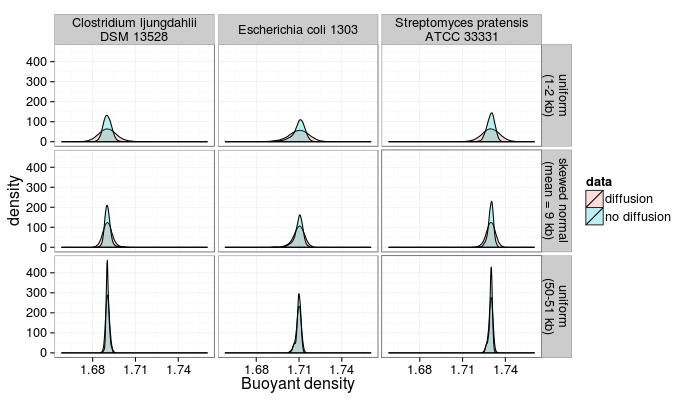

In [187]:
%%R -w 700 -h 400

tbl.f$fld = factor(tbl.f$fld, 
                   levels=c('uniform\n(1-2 kb)','skewed normal\n(mean = 9 kb)','uniform\n(50-51 kb)'))


ggplot(tbl.f, aes(BD, fill=data)) +
    geom_density(alpha=0.25) +
    facet_grid(fld ~ taxon_name) +
    theme_bw() +
    labs(x = 'Buoyant density') +
    theme(
        text=element_text(size=16),
        axis.title.y = element_text(vjust=1)
        )

In [188]:
%%R -i figDir 

outFile = paste(c(figDir, 'genome3_fragKDE_dif.pdf'), collapse='/')
ggsave(outFile, width=10, height=5.71) 